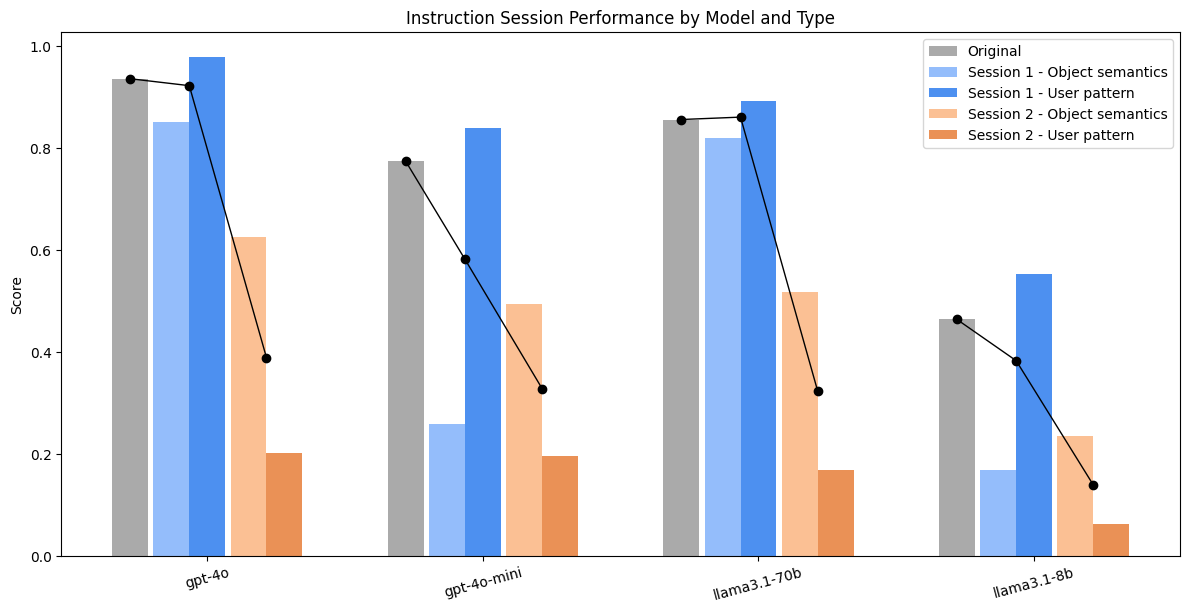

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정리
models = ["gpt-4o", "gpt-4o-mini", "llama3.1-70b", "llama3.1-8b"]

original = [0.936, 0.774194, 0.856, 0.464]

stage1 = {
    "Object semantics": [0.8516853933, 0.2584269663, 0.8202247191, 0.1685393258],
    "User pattern": [0.9785714286, 0.8392857143, 0.8928571429, 0.5535714286]
}

stage2 = {
    "Object semantics": [0.6247191011, 0.4943820225, 0.5168539326, 0.2359550562],
    "User pattern": [0.2017857143, 0.1964285714, 0.1696428571, 0.0625]
}

average_scores = {
    "Original": [0.936, 0.774194, 0.856, 0.464],
    "Stage1": [0.9223880597, 0.5820895522, 0.8606965174, 0.3830845771],
    "Stage2": [0.3890547264, 0.328358209, 0.3233830846, 0.1393034826]
}

# 시각화 준비
x = np.arange(len(models))

bar_width = 0.13
gap_between_stages = 0.02  # stage1과 stage2 사이 간격

fig, ax = plt.subplots(figsize=(12, 6))

x_ori = x - bar_width*2 - gap_between_stages # Original 위치
x_s1_obj = x - bar_width # Stage1 - object
x_s1_usr = x   # Stage1 - user
x_s2_obj = x + bar_width + gap_between_stages  # Stage2 - object
x_s2_usr = x + bar_width * 2 + gap_between_stages  # Stage2 - user

# 색상 지정
color_original = "#AAAAAA"
color_stage1_obj = "#94BDFB"
color_stage1_user = "#4D90F0"   # 더 진한 파랑
color_stage2_obj = "#FBC094"
color_stage2_user = "#EA9156"   # 더 진한 주황

# Original (Object semantics만 존재, 하나의 범례로 통합)
ax.bar(x - bar_width*2 - gap_between_stages, original, bar_width,
       label="Original", color=color_original)

# Stage 1
ax.bar(x - bar_width, stage1["Object semantics"], bar_width,
       label="Session 1 - Object semantics", color=color_stage1_obj)
ax.bar(x, stage1["User pattern"], bar_width,
       label="Session 1 - User pattern", color=color_stage1_user)

# Stage 2
ax.bar(x + bar_width + gap_between_stages, stage2["Object semantics"], bar_width,
       label="Session 2 - Object semantics", color=color_stage2_obj)
ax.bar(x + bar_width*2 + gap_between_stages, stage2["User pattern"], bar_width,
       label="Session 2 - User pattern", color=color_stage2_user)

avg_ori_x = x_ori  # 하나의 점
avg_s1_x = (x_s1_obj + x_s1_usr) / 2
avg_s2_x = (x_s2_obj + x_s2_usr) / 2

for i in range(len(models)):
    ax.plot(avg_ori_x[i], average_scores["Original"][i], 'o', color='black')
    ax.plot(avg_s1_x[i], average_scores["Stage1"][i], 'o', color='black')
    ax.plot(avg_s2_x[i], average_scores["Stage2"][i], 'o', color='black')
    ax.plot([avg_ori_x[i], avg_s1_x[i], avg_s2_x[i]],
            [average_scores["Original"][i], average_scores["Stage1"][i], average_scores["Stage2"][i]],
            color='black', linestyle='-', linewidth=1)

# 라벨링
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Score")
ax.set_title("Instruction Session Performance by Model and Type")
ax.legend()
plt.tight_layout()
plt.xticks(rotation=15)

plt.show()

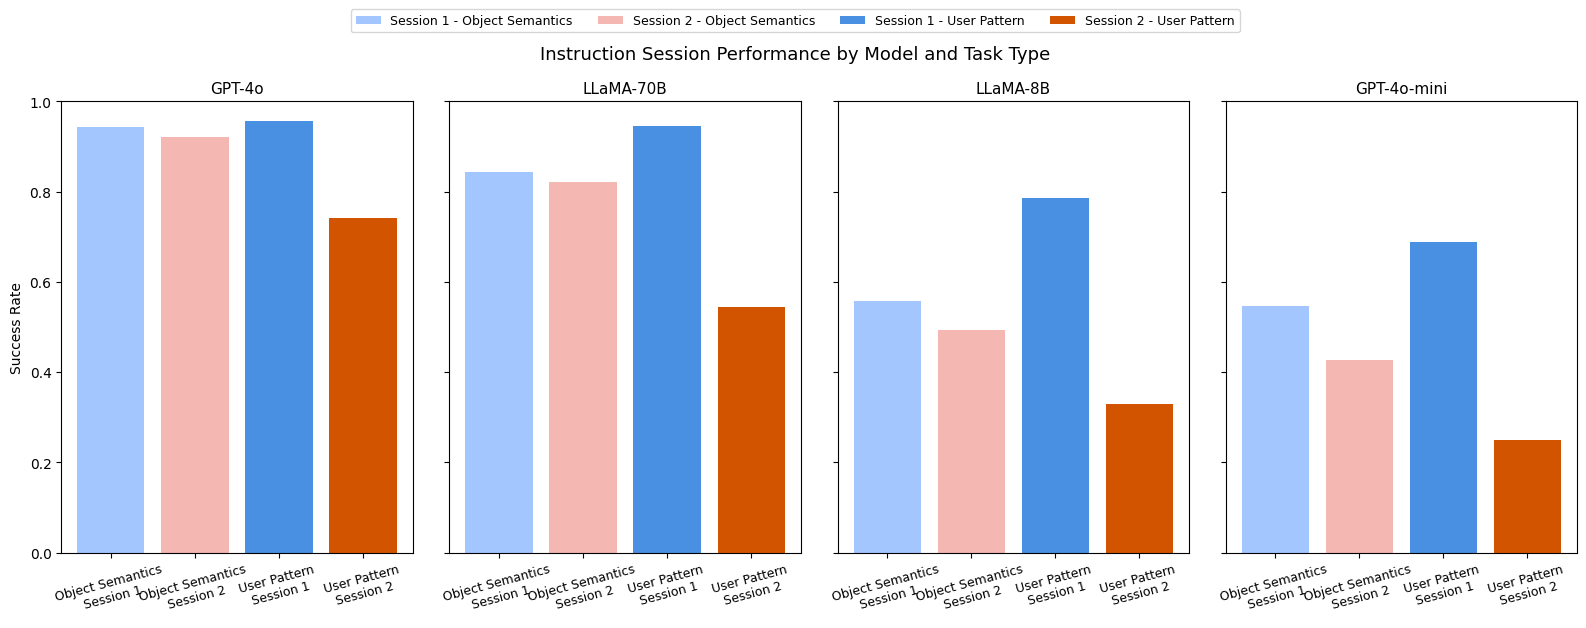

In [7]:
# 라이브러리 재불러오기
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 데이터 재정의
data_stage_task = {
    "Model": [
        "GPT-4o", "GPT-4o", "GPT-4o", "GPT-4o",
        "LLaMA-8B", "LLaMA-8B", "LLaMA-8B", "LLaMA-8B",
        "LLaMA-70B", "LLaMA-70B", "LLaMA-70B", "LLaMA-70B",
        "GPT-4o-mini", "GPT-4o-mini", "GPT-4o-mini", "GPT-4o-mini",
    ],
    "Task Type": [
        "Object Semantics", "Object Semantics", "User Pattern", "User Pattern",
        "Object Semantics", "Object Semantics", "User Pattern", "User Pattern",
        "Object Semantics", "Object Semantics", "User Pattern", "User Pattern",
        "Object Semantics", "Object Semantics", "User Pattern", "User Pattern"
    ],
    "Session": [
        "Session 1", "Session 2", "Session 1", "Session 2",
        "Session 1", "Session 2", "Session 1", "Session 2",
        "Session 1", "Session 2", "Session 1", "Session 2",
        "Session 1", "Session 2", "Session 1", "Session 2"
    ],
    "Success Rate": [
        0.9438202247, 0.9213483146, 0.9553571429, 0.7410714286,
        0.5568181818, 0.4939759036, 0.7857142857, 0.3303571429,
        0.8426966292, 0.8202247191, 0.9464285714, 0.5446428571,
        0.5454545455, 0.4269662921, 0.6875, 0.25,
    ]
}
df_stage_task = pd.DataFrame(data_stage_task)

# 모델 순서 및 색상 설정
model_order = ["GPT-4o", "LLaMA-70B", "LLaMA-8B", "GPT-4o-mini"]
df_ordered = df_stage_task.copy()
df_ordered["Model"] = pd.Categorical(df_ordered["Model"], categories=model_order, ordered=True)
df_ordered = df_ordered.sort_values("Model")

color_map = {
    ("Session 1", "Object Semantics"): "#A3C6FF",
    ("Session 1", "User Pattern"): "#4A90E2",
    ("Session 2", "Object Semantics"): "#F5B7B1",
    ("Session 2", "User Pattern"): "#D35400"
}
df_ordered["Color Key"] = list(zip(df_ordered["Session"], df_ordered["Task Type"]))
df_ordered["Color"] = df_ordered["Color Key"].map(color_map)

# 시각화
fig, axes = plt.subplots(1, len(model_order), figsize=(16, 6), sharey=True)

for ax, model in zip(axes, model_order):
    df_model = df_ordered[df_ordered["Model"] == model]
    bars = ax.bar(
        x=df_model["Task Type"] + "\n" + df_model["Session"],
        height=df_model["Success Rate"],
        color=df_model["Color"]
    )
    ax.set_title(model, fontsize=11)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Success Rate" if model == model_order[0] else "", fontsize=10)
    ax.set_xticks(range(len(df_model)))
    ax.set_xticklabels(df_model["Task Type"] + "\n" + df_model["Session"], rotation=15, fontsize=9)

legend_elements = [
    Patch(facecolor="#A3C6FF", label="Session 1 - Object Semantics"),
    Patch(facecolor="#F5B7B1", label="Session 2 - Object Semantics"),
    Patch(facecolor="#4A90E2", label="Session 1 - User Pattern"),
    Patch(facecolor="#D35400", label="Session 2 - User Pattern"),
]
fig.legend(handles=legend_elements, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.05), fontsize=9)
fig.suptitle("Instruction Session Performance by Model and Task Type", fontsize=13)
plt.tight_layout()
plt.show()

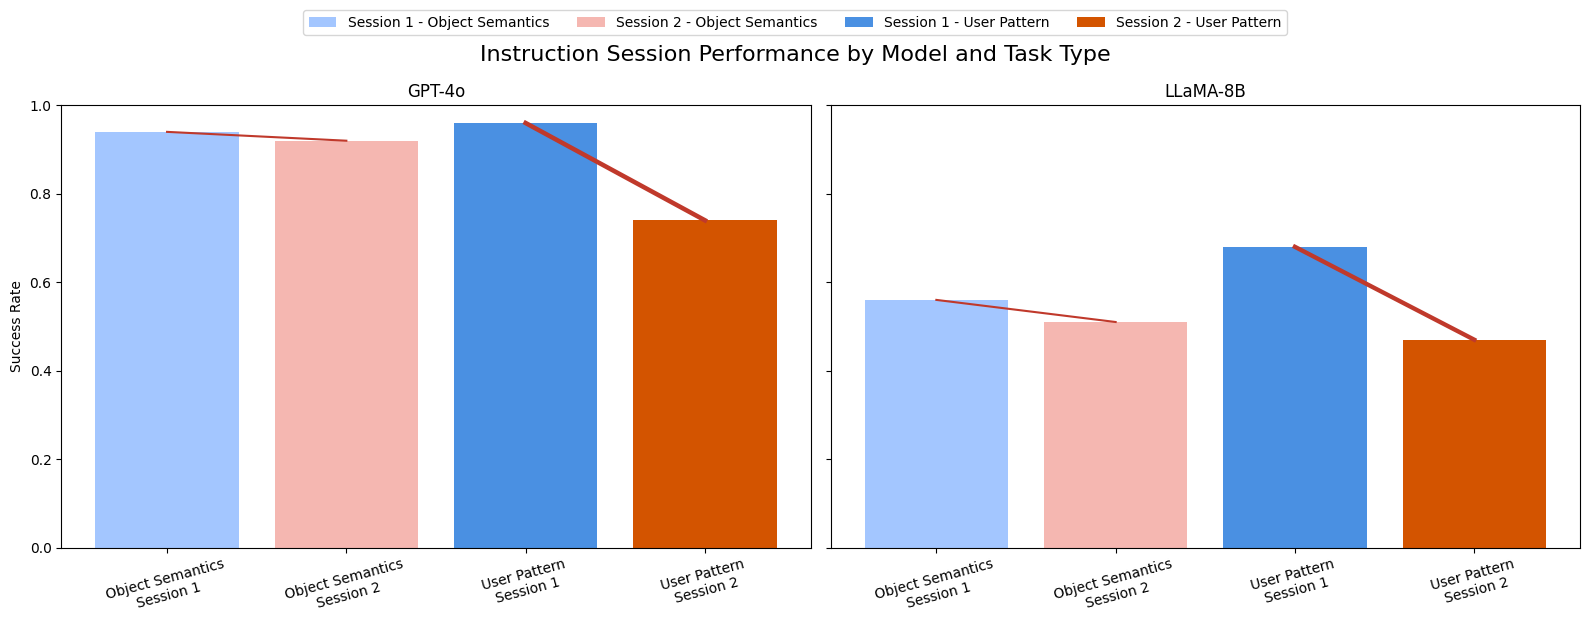

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 예시 데이터프레임 생성
data = {
    "Model": ["GPT-4o", "GPT-4o", "GPT-4o", "GPT-4o", "LLaMA-8B", "LLaMA-8B", "LLaMA-8B", "LLaMA-8B"],
    "Task Type": ["Object Semantics", "Object Semantics", "User Pattern", "User Pattern"] * 2,
    "Session": ["Session 1", "Session 2"] * 4,
    "Success Rate": [0.94, 0.92, 0.96, 0.74, 0.56, 0.51, 0.68, 0.47],
    "Color": ["#A3C6FF", "#F5B7B1", "#4A90E2", "#D35400"] * 2
}
df_ordered = pd.DataFrame(data)
models = df_ordered["Model"].unique()

# 시각화
fig, axes = plt.subplots(1, len(models), figsize=(16, 6), sharey=True)

for ax, model in zip(axes, models):
    df_model = df_ordered[df_ordered["Model"] == model]

    # 막대 그래프
    bars = ax.bar(
        x=df_model["Task Type"] + "\n" + df_model["Session"],
        height=df_model["Success Rate"],
        color=df_model["Color"],
        zorder=2
    )

    # 변화 수치 및 기울기선 표시
    for task_type in df_model["Task Type"].unique():
        df_task = df_model[df_model["Task Type"] == task_type].sort_values("Session")
        if df_task.shape[0] == 2:
            val1 = df_task.iloc[0]["Success Rate"]
            val2 = df_task.iloc[1]["Success Rate"]
            drop = val1 - val2
            direction = "↓" if drop > 0 else "↑"
            label = f"{direction}{abs(drop):.2f}"

            x_ticks = list(df_model["Task Type"] + "\n" + df_model["Session"])
            x1 = x_ticks.index(df_task.iloc[0]["Task Type"] + "\n" + df_task.iloc[0]["Session"])
            x2 = x_ticks.index(df_task.iloc[1]["Task Type"] + "\n" + df_task.iloc[1]["Session"])

            # 선 그리기
            color = "#C0392B" if drop > 0 else "#27AE60"
            lw = max(1.5, abs(drop) * 15)
            ax.plot([x1, x2], [val1, val2], color=color, lw=lw, zorder=3)

            # # 텍스트 표시
            # mid_x, mid_y = (x1 + x2) / 2, (val1 + val2) / 2
            # ax.text(mid_x, mid_y, label, ha='center', va='center', fontsize=9,
            #         bbox=dict(facecolor="white", alpha=0.8, pad=1), zorder=4)

    ax.set_title(model)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Success Rate" if model == models[0] else "")
    ax.set_xticks(range(len(df_model)))
    ax.set_xticklabels(df_model["Task Type"] + "\n" + df_model["Session"], rotation=15)

# 범례
legend_elements = [
    Patch(facecolor="#A3C6FF", label="Session 1 - Object Semantics"),
    Patch(facecolor="#F5B7B1", label="Session 2 - Object Semantics"),
    Patch(facecolor="#4A90E2", label="Session 1 - User Pattern"),
    Patch(facecolor="#D35400", label="Session 2 - User Pattern"),
]
fig.legend(handles=legend_elements, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.05))
fig.suptitle("Instruction Session Performance by Model and Task Type", fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
plt.show()